In [6]:
import pandas as pd
import numpy as np
xls = pd.read_excel('Investment_dataset\IMFInvestmentandCapitalStockDataset2021 (2).xlsx',sheet_name=['Definitions','Dataset'])
df = xls['Dataset']
df = df.dropna()
# df.head()


<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26316\218476968.py:3: SyntaxWarning: invalid escape sequence '\I'
  xls = pd.read_excel('Investment_dataset\IMFInvestmentandCapitalStockDataset2021 (2).xlsx',sheet_name=['Definitions','Dataset'])


In [7]:
df = df[df['country'] == 'India']
df.head()

,isocode,ifscode,country,year,igov_rppp,kgov_rppp,ipriv_rppp,kpriv_rppp,ippp_rppp,kppp_rppp,GDP_rppp,igov_n,kgov_n,ipriv_n,kpriv_n,kppp_n,GDP_n,income
4585,IND,534,India,1985,104.837128,1150.348022,63.565014,1032.477661,0.0,0.0,1184.217896,386.210419,4237.776855,234.167694,3803.553223,0.0,2845.340820,Emerging Market Economies
4586,IND,534,India,1986,123.229591,1219.615479,61.220966,1045.347778,0.0,0.0,1240.782837,487.095917,4820.836914,241.991257,4132.000000,0.0,3183.659424,Emerging Market Economies
4587,IND,534,India,1987,107.421791,1304.720703,97.403656,1055.095703,0.0,0.0,1289.984375,463.895630,5634.371094,420.632812,4556.377930,0.0,3618.646973,Emerging Market Economies
4588,IND,534,India,1988,110.030991,1371.472412,101.886238,1099.467773,0.0,0.0,1414.181274,525.495972,6550.002930,486.597565,5250.937988,0.0,4293.629883,Emerging Market Economies
4589,IND,534,India,1989,107.043198,1438.534790,123.371620,1145.846680,0.0,0.0,1498.287354,563.203918,7568.798828,649.115295,6028.831055,0.0,4932.776367,Emerging Market Economies


##With Single factor 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target variable
X = pd.DataFrame(df,columns=['kgov_rppp'])
y = df['GDP_rppp']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (28, 1)
X_test shape: (7, 1)
y_train shape: (28,)
y_test shape: (7,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
le = LinearRegression()
le.fit(X_train, y_train)
y_pred = le.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {le.score(X_test, y_test)}")


Mean squared error: 271024.0368077816
R2 score: 0.8635594312987258


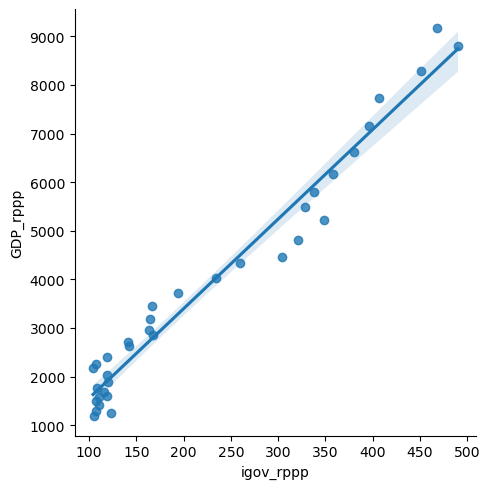

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='kgov_rppp', y='GDP_rppp' , data=df)

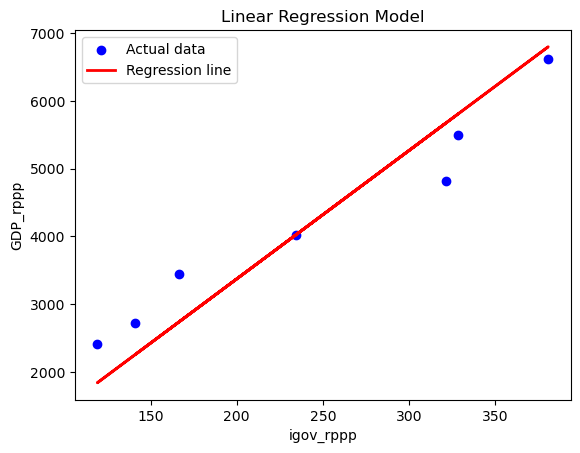

Equation of the line: GDP_rppp = 18.93 * igov_rppp + -412.54


In [14]:
# Plot the data points
plt.scatter(X_test, y_test, color='blue', label='Actual data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel('igov_rppp')
plt.ylabel('GDP_rppp')
plt.title('Linear Regression Model')
plt.legend()

# Display the plot
plt.show()

# Print the equation of the line
slope = le.coef_[0]
intercept = le.intercept_
print(f"Equation of the line: GDP_rppp = {slope:.2f} * igov_rppp + {intercept:.2f}")

In [38]:

# with multiple data

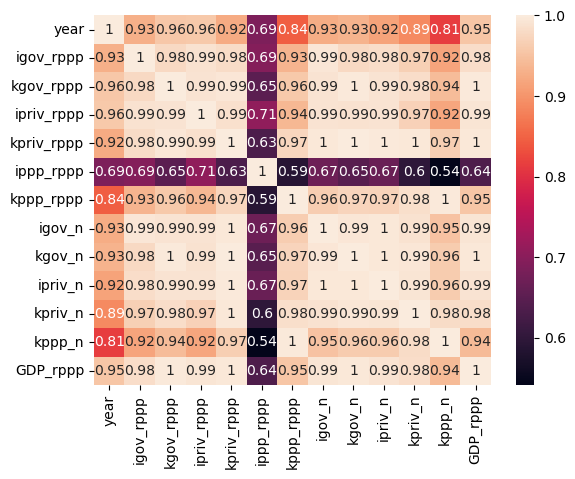

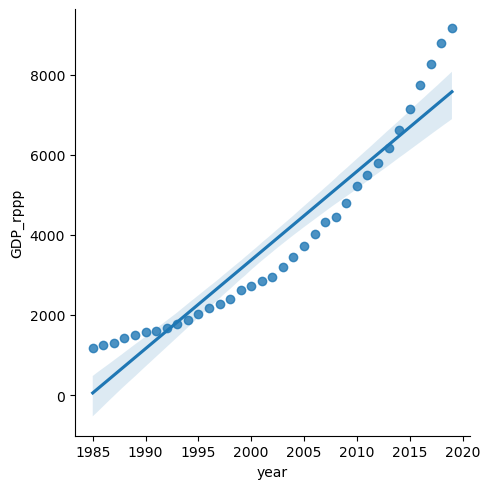

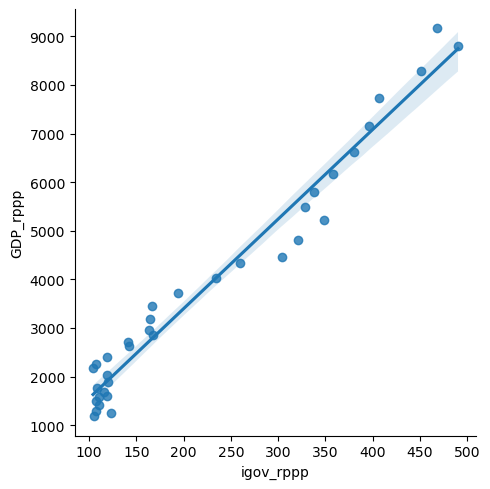

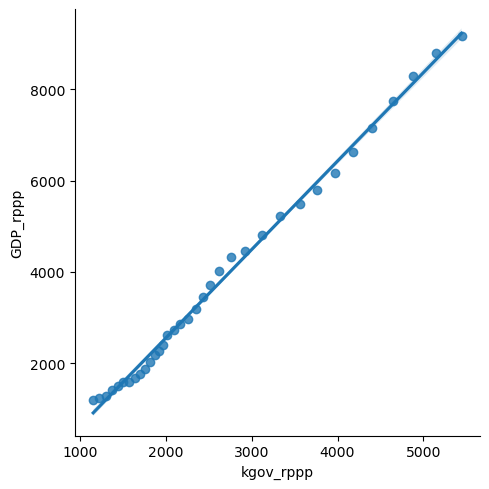

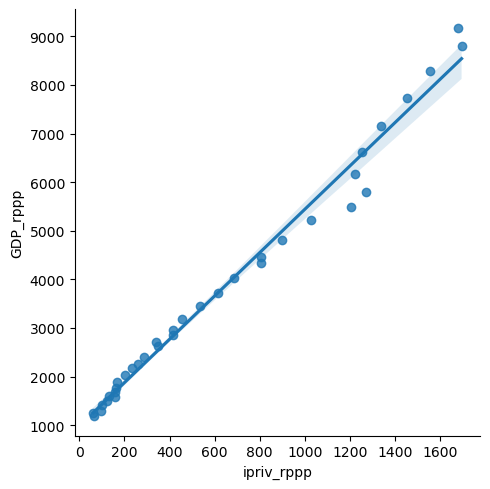

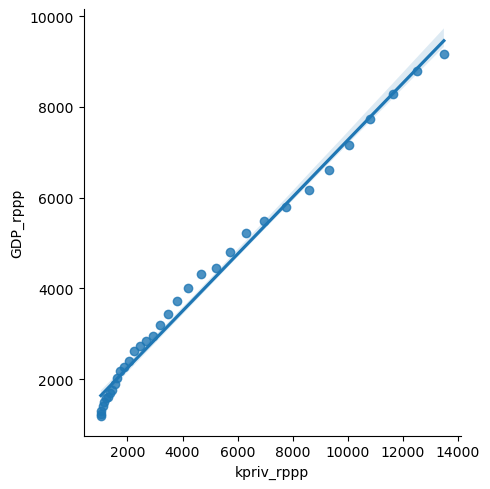

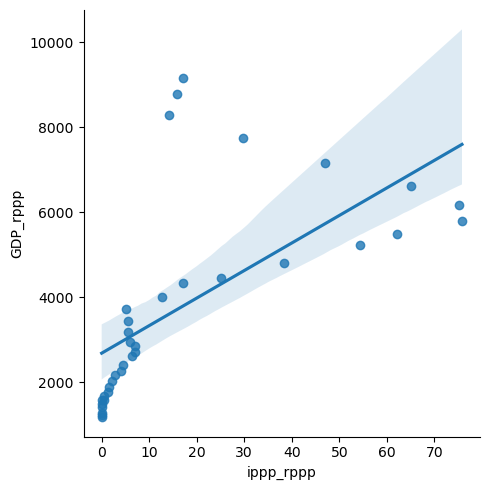

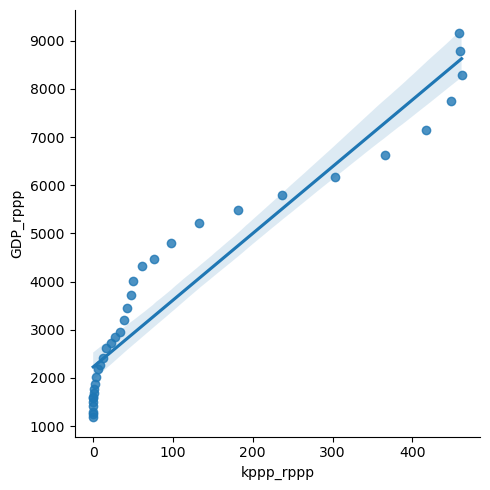

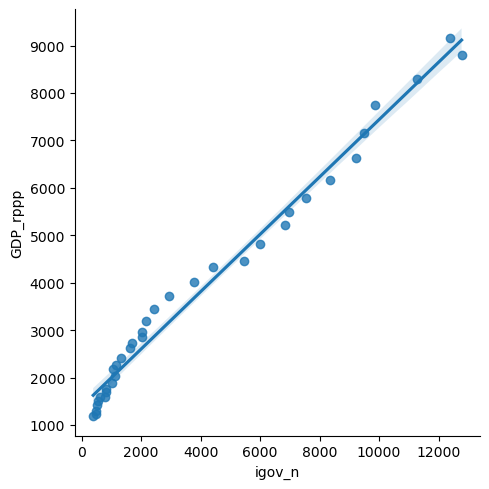

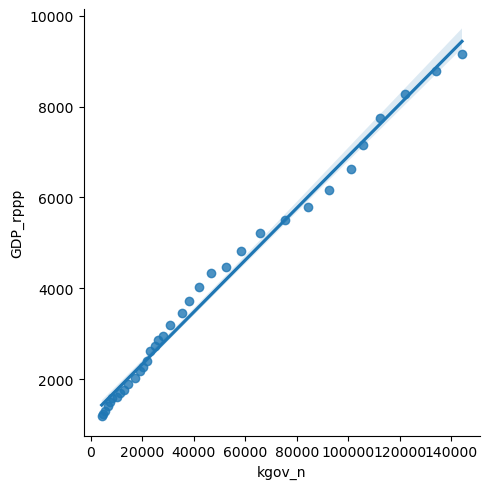

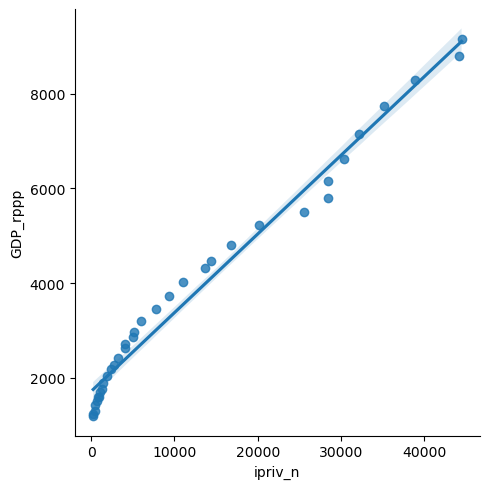

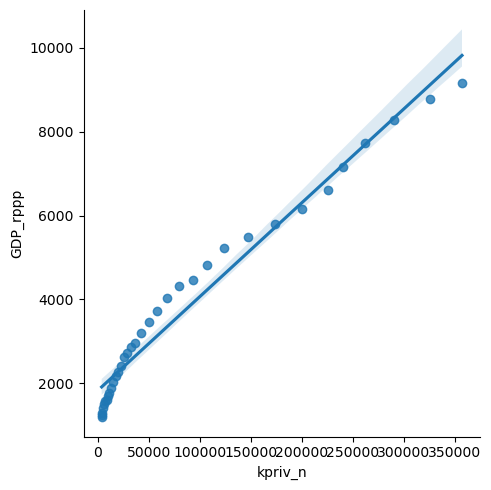

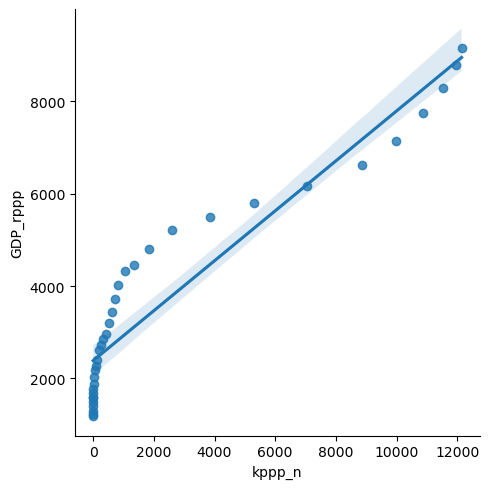

In [32]:
df_corr= pd.DataFrame(df,columns=['year', 'igov_rppp', 'kgov_rppp',
       'ipriv_rppp', 'kpriv_rppp', 'ippp_rppp', 'kppp_rppp','igov_n', 'kgov_n', 'ipriv_n', 'kpriv_n', 'kppp_n','GDP_rppp'])
hm = sns.heatmap(df_corr.corr(), annot=True)
for col in df_corr.columns:
    if col != 'GDP_rppp':
        sns.lmplot(x=col, y='GDP_rppp', data=df)


In [39]:
# Define features and target variable
X = pd.DataFrame(df,columns=['year', 'igov_rppp', 'kgov_rppp',
       'ipriv_rppp', 'kpriv_rppp', 'kppp_rppp','igov_n', 'kgov_n', 'ipriv_n', 'kpriv_n', 'kppp_n','income'])
y = df['GDP_rppp']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (28, 12)
X_test shape: (7, 12)
y_train shape: (28,)
y_test shape: (7,)


In [42]:
le = LinearRegression()
le.fit(X_train, y_train)
y_pred = le.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {le.score(X_test, y_test)}")
# Plot the data points


Mean squared error: 3516.7272923587575
R2 score: 0.9982295877613356


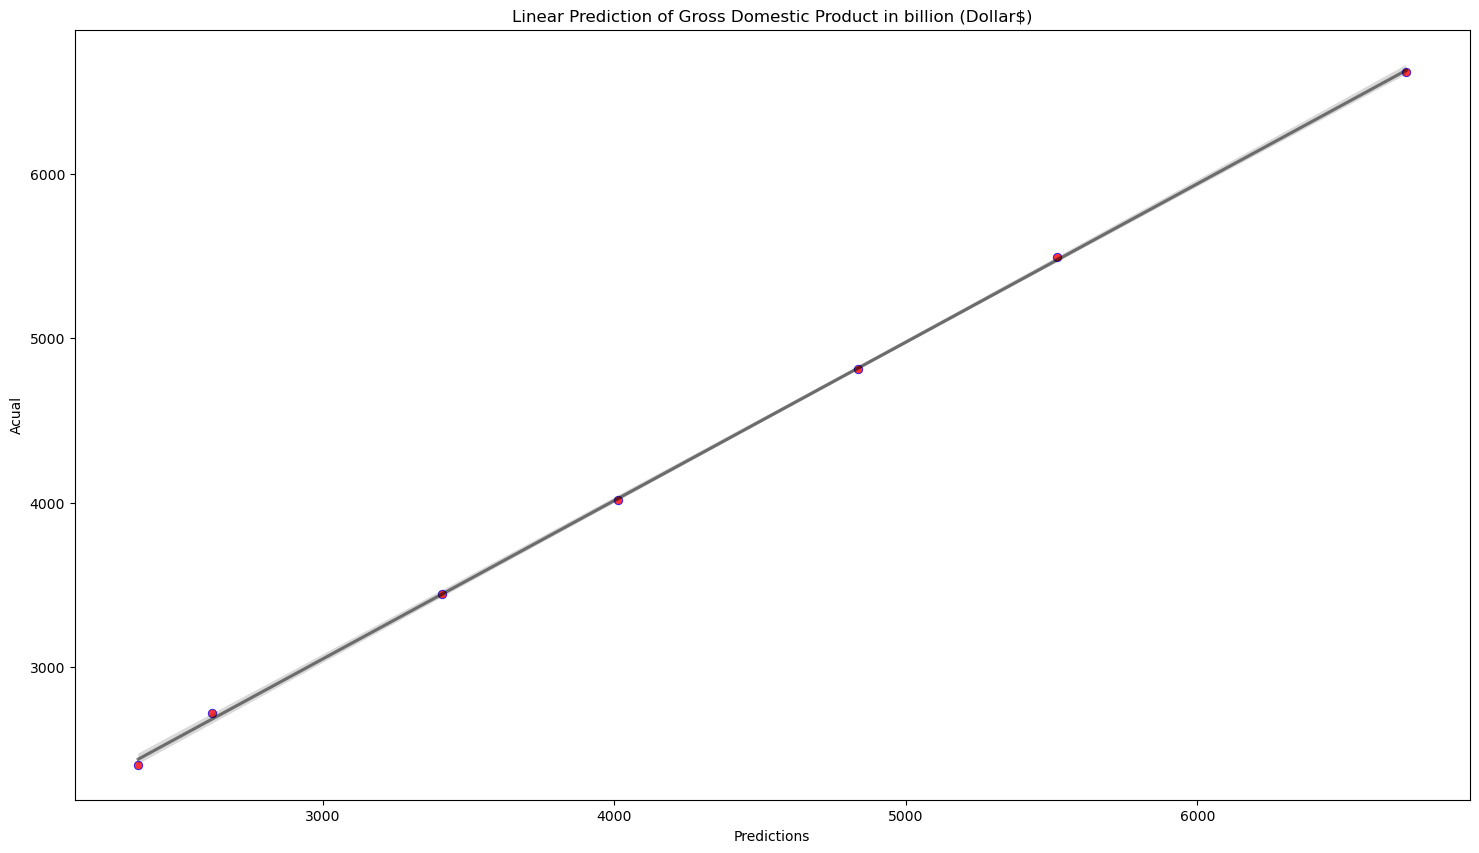

In [50]:
plt.figure(figsize=(18,10))
sns.regplot(x=y_pred, y=y_test,
            scatter_kws={'color':'red', 'edgecolor':'blue', 'linewidths':0.7},
            line_kws={'color':'black', 'alpha':0.5})

plt.xlabel('Predictions')
plt.ylabel('Acual')
plt.title("Linear Prediction of Gross Domestic Product in billion (Dollar$)")
plt.show()